In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import os

In [4]:
answer_types_all = np.load("ckpts/sft_gsm8k_llama7B_full3/checkpoint_10000/hf_model/train_answer_types_all100.npy")

num_correct_generations = (answer_types_all==0).sum(axis=-1)

In [5]:
answer_types_all2 = np.load("llama7B_GSM8k_train_answer_types_all100.npy")
num_correct_generations2 = (answer_types_all2==0).sum(axis=-1)

In [6]:
np.log(1)

0.0

Text(0.5, 1.0, 'GSM8K')

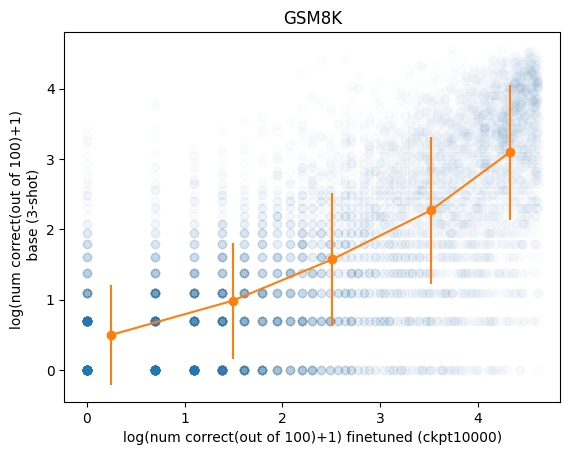

In [14]:
plt.scatter(np.log(num_correct_generations+1), np.log(num_correct_generations2+1), alpha=0.01)
bins = [0, 1, 2, 3, 4, 5,]

means0 = []
means = []
stds = []
for i in range(len(bins)-1):
    idxs = np.where((np.log(num_correct_generations+1) >= bins[i]) & (np.log(num_correct_generations+1) < bins[i+1]))[0]
    mean = np.mean(np.log(num_correct_generations2+1)[idxs])
    std = np.std(np.log(num_correct_generations2+1)[idxs]) 
    means.append(mean)
    stds.append(std)
    means0.append(np.mean(np.log(num_correct_generations+1)[idxs]))
    
plt.errorbar(means0, means, yerr=stds, fmt='o-', color = "C1")


plt.xlabel("log(num correct(out of 100)+1) finetuned (ckpt10000)" )
plt.ylabel("log(num correct(out of 100)+1) \n base (3-shot)" )
plt.title("GSM8K")


In [202]:
# firstHalf_answer_types_all = np.load("ckpts/sft_gsm8k_llama7B_subsample2/checkpoint_10000/hf_model/trainpts_firstHalf_answer_types_all.npy")
# secondHalf_answer_types_all = np.load("ckpts/sft_gsm8k_llama7B_subsample1/checkpoint_10000/hf_model/trainpts_secondHalf_answer_types_all.npy")
# answer_types_all  = np.concatenate([firstHalf_answer_types_all, secondHalf_answer_types_all])

In [8]:
num_correct_generations

array([85, 54,  3, ..., 13,  3,  1])

/tmp/ipykernel_612/2056974825.py:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(num_correct_generations2), (likelihoods_all[likelihoods_idx]), alpha=0.05)
/tmp/ipykernel_612/2056974825.py:10: RuntimeWarning: divide by zero encountered in log
  idxs = np.where((np.log(num_correct_generations2) >= bins[i]) & (np.log(num_correct_generations2) < bins[i+1]))[0]


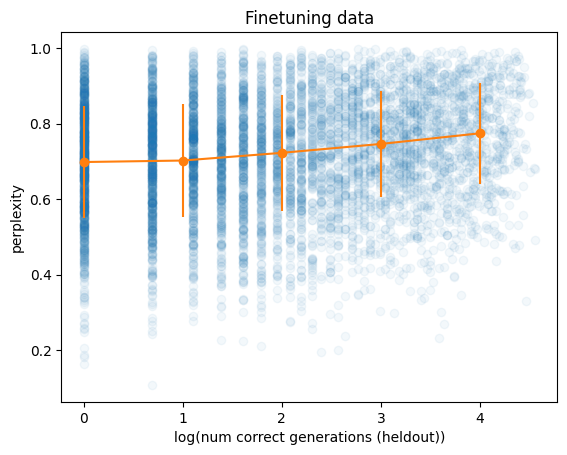

In [22]:
likelihoods_idx = 5

plt.scatter(np.log(num_correct_generations2), (likelihoods_all[likelihoods_idx]), alpha=0.05)

bins = [0, 1, 2, 3, 4, 5,]

means = []
stds = []
for i in range(len(bins)-1):
    idxs = np.where((np.log(num_correct_generations2) >= bins[i]) & (np.log(num_correct_generations2) < bins[i+1]))[0]
    mean = np.mean(likelihoods_all[likelihoods_idx][idxs])
    std = np.std(likelihoods_all[likelihoods_idx][idxs]) 
    means.append(mean)
    stds.append(std)
    
plt.errorbar(np.arange(len(means)), means, yerr=stds, fmt='o-', color = "C1")

plt.xlabel("log(num correct generations (heldout))")
plt.ylabel("perplexity")
plt.title("Finetuning data")

plt.savefig("delete.jpg")

In [207]:
num_correct_generations = (np.load("ckpts/sft_gsm8k_llama7B_full2/checkpoint_25000/hf_model/trainpts_answer_types_all5.npy")==0).sum(axis=-1)

In [192]:
(np.e**np.load("ckpts/sft_gsm8k_llama7B_full2/checkpoint_10000/hf_model/answer_log_probs_mean_all2.npy")).mean()

0.6415154

In [167]:
len(likelihoods_all)

5

In [16]:
checkpoints = ["00500", "01000","02000", "05000", "10000", "15000", "20000", "25000"]
likelihoods_all = []
for checkpoint in checkpoints:
    model_path = f"ckpts/sft_gsm8k_llama7B_full2/checkpoint_{checkpoint}/hf_model/"
    likelihoods = np.e**np.load(os.path.join(model_path, "trainpts_answer_log_probs_mean_all2.npy"))
    likelihoods_all.append(likelihoods)
    print(likelihoods.mean())
likelihoods_all = np.array(likelihoods_all)

0.59911203
0.6284531
0.65064234
0.67945445
0.70119673
0.7115293
0.70566326
0.70084536


In [111]:
likelihoods_all = np.array(likelihoods_all)

(array([1.000e+00, 3.000e+00, 3.600e+01, 1.210e+02, 2.450e+02, 6.000e+02,
        8.360e+02, 1.139e+03, 1.187e+03, 1.040e+03]),
 array([0.20476425, 0.28425148, 0.36373872, 0.44322592, 0.52271318,
        0.60220039, 0.68168759, 0.76117486, 0.84066206, 0.92014933,
        0.99963653]),
 <BarContainer object of 10 artists>)

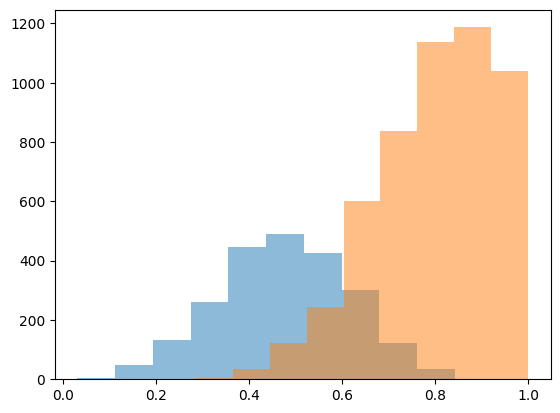

In [141]:
plt.hist(likelihoods_all[-1][idxs1], alpha = 0.5)
plt.hist(likelihoods_all[-1][idxs2], alpha = 0.5)

(array([1.28954883, 0.        , 0.38758804, 0.        , 0.16790405,
        0.        , 0.09328003, 0.        , 0.04340377, 0.01827527]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

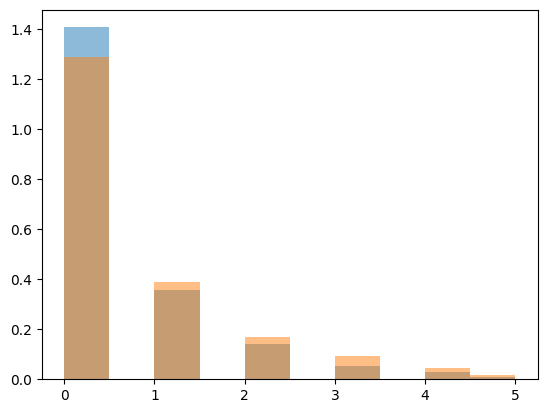

In [144]:
plt.hist(num_correct_generations[np.where(likelihoods_all[-1]< 0.6)[0]], alpha = 0.5, density = True)
plt.hist(num_correct_generations[np.where(likelihoods_all[-1]> 0.6)[0]], alpha = 0.5, density = True)

(array([0.01666914, 0.12710218, 0.32713189, 0.71260566, 1.04807207,
        1.17517425, 1.61482278, 1.82110336, 1.92320184, 1.54606258]),
 array([0.02988745, 0.12686236, 0.22383727, 0.32081217, 0.41778708,
        0.51476198, 0.61173689, 0.7087118 , 0.80568671, 0.90266162,
        0.99963653]),
 <BarContainer object of 10 artists>)

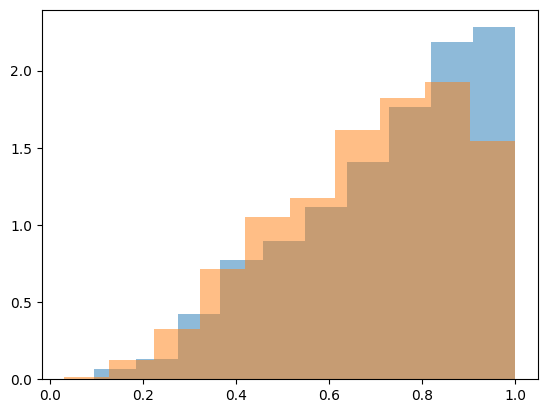

In [145]:
plt.hist(likelihoods_all[-1][np.where(num_correct_generations>0)[0]], alpha = 0.5, density = True)
plt.hist(likelihoods_all[-1][np.where(num_correct_generations==0)[0]], alpha = 0.5, density = True)

In [139]:
num_correct_generations

array([5, 0, 0, ..., 1, 1, 0])

In [126]:
len(idxs1)

2265

In [195]:
(likelihoods_all[-1, :] > likelihoods_all[0, :]).sum()/len(likelihoods_all[0, :])

0.6969088719389803

In [196]:
(likelihoods_all[-1, :] <= likelihoods_all[0, :]).sum()/len(likelihoods_all[0, :])

0.3030911280610197

Text(0.5, 1.0, 'Finetuning data')

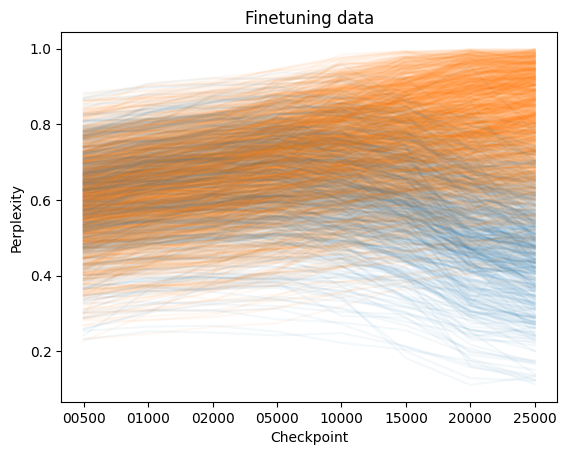

In [188]:
for i in range(2000):
    if likelihoods_all[-1, i] > likelihoods_all[0, i]:
        plt.plot(likelihoods_all[:, i], c = "C1", alpha = 0.05)
    else:
        plt.plot(likelihoods_all[:, i], c = "C0", alpha = 0.05)

plt.xlabel("Checkpoint")
plt.xticks(range(8), checkpoints)
plt.ylabel("Perplexity")
plt.title("Finetuning data")

Text(0.5, 1.0, 'Finetuning data')

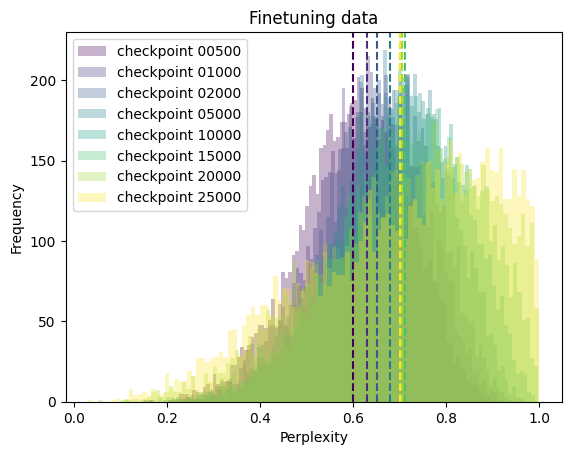

In [189]:
# make 6 subplots

# fig, axs = plt.subplots(8, 1, figsize=(5, 15), sharey=True, sharex=True)
viridis = plt.cm.viridis
colors = [viridis(i) for i in np.linspace(0, 1, 8)]

for i in range(8):
    # ax = axs[i]
    plt.hist(likelihoods_all[i], bins=100, alpha=0.3, label=f"checkpoint {checkpoints[i]}", color=colors[i])
    mean = likelihoods_all[i].mean()
    plt.axvline(mean, color=colors[i], linestyle="--")
    # ax.set_title(f"checkpoint {checkpoints[i]}")
plt.legend()
plt.xlabel("Perplexity")
plt.ylabel("Frequency")
plt.title("Finetuning data")

(array([0.0164232 , 0.09488961, 0.29014327, 0.66787686, 0.98174249,
        1.06568329, 1.45619053, 1.75545775, 2.04560098, 1.93793777]),
 array([0.02988745, 0.12686236, 0.22383727, 0.32081217, 0.41778708,
        0.51476198, 0.61173689, 0.7087118 , 0.80568671, 0.90266162,
        0.99963653]),
 <BarContainer object of 10 artists>)

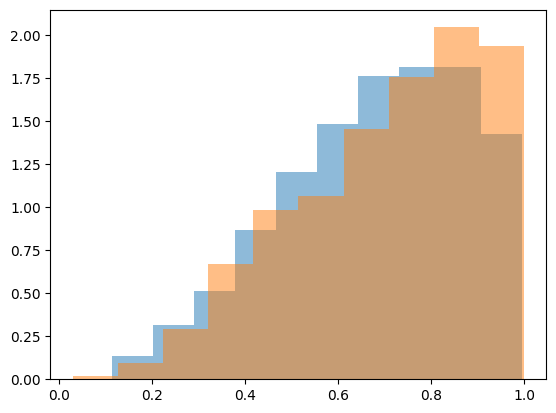

In [86]:
num_correct_threshold = 1

plt.hist(likelihoods[np.where(num_correct_generations<=num_correct_threshold)[0]], alpha=0.5, density=True)
plt.hist(likelihoods[np.where(num_correct_generations>num_correct_threshold)[0]], alpha=0.5, density=True)


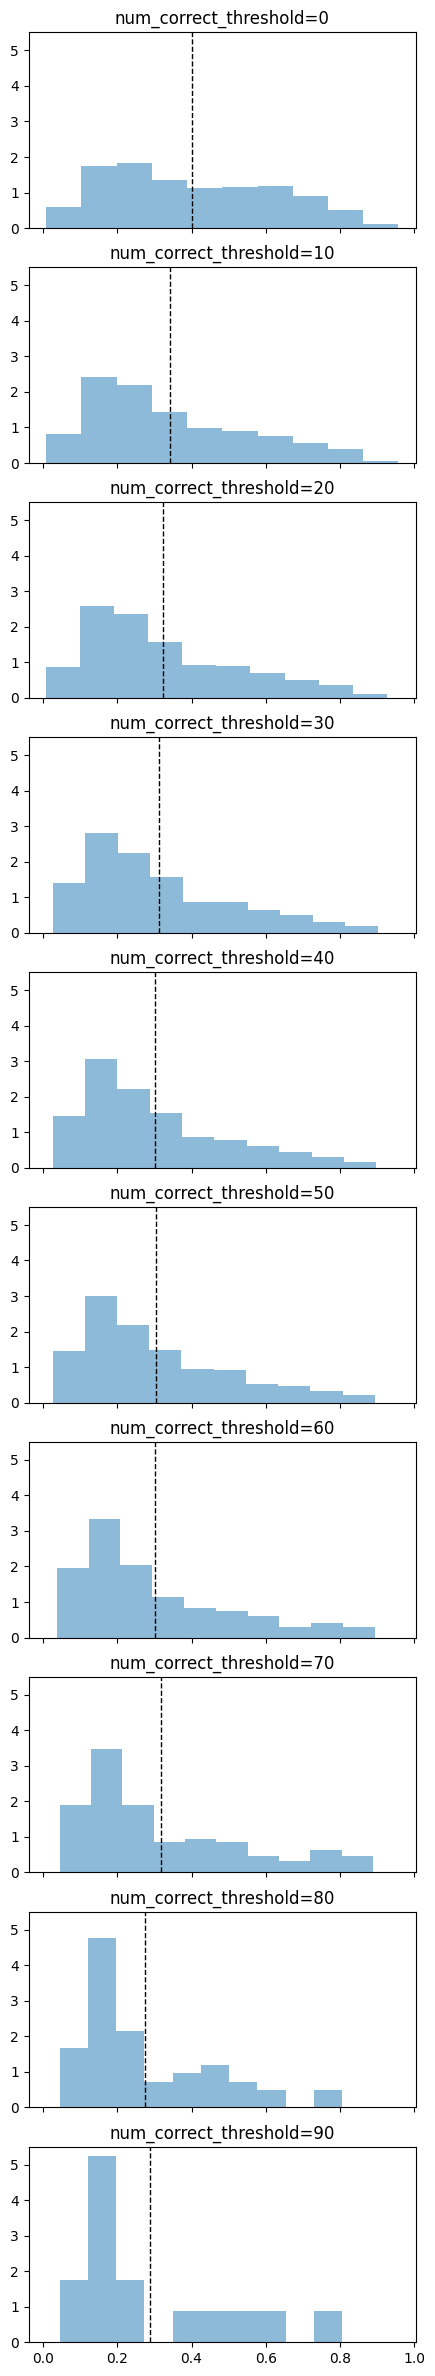

In [47]:
#  make ten subplots

fig, axs = plt.subplots(10, 1, figsize=(5, 30), sharex=True, sharey=True)


for i in range(0, 10):
    num_correct_threshold = i*10
    axs[i].hist(likelihoods[np.where(num_correct_generations>=num_correct_threshold)[0]], alpha=0.5, density=True)
    mean = np.mean(likelihoods[np.where(num_correct_generations>=num_correct_threshold)[0]])
    axs[i].axvline(mean, color='k', linestyle='dashed', linewidth=1)
    axs[i].set_title(f"num_correct_threshold={num_correct_threshold}")
# plt.hist(likelihoods[np.where(num_correct_generations<=num_correct_threshold)[0]], alpha=0.5, density=True)